In [29]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open('data.json', 'r') as file:
    data_array = json.load(file)

# remove not pre-trained model
# data_array = [i for i in data_array if i["model_name"] != "ConvNeXtKAN"]

not_pretrained = ["BasicMLP_np", "Effective_b1_KAN_np", "BasicMLP_np_50", "ConvNeXtKAN"]

data_array_pretrained = [i for i in data_array if i["model_name"] not in not_pretrained]
data_array_not_pretrained = [i for i in data_array if i["model_name"] in not_pretrained]

hash_map = {
    "BasicMLP_np": "EfficientNetB1 (No Pretraining)",
    "EfficientNet_pretrained": "EfficientNetB1",
    "Effective_b1_KAN_5epoch_64": "EfficientNetB1Kan (Optimized for 5 epochs)",
    "Effective_b1_KAN_30": "EfficientNetB1Kan (Optimized for 30 epochs)",
    "Effective_b1_KAN_5epoch_7": "EfficientNssetB1Kan (Optimized for 5 epochs)",
    "Effective_b1_KAN_np": "EfficientNetB1Kan (No Pretraining)",
    "BasicMLP_np_50": "ConvNeXtKAN",
    "ConvNeXtKAN": "ConvNeXtKAN"
}

len(data_array)

7

(None, 'Accuracy for epochs in testing dataset')

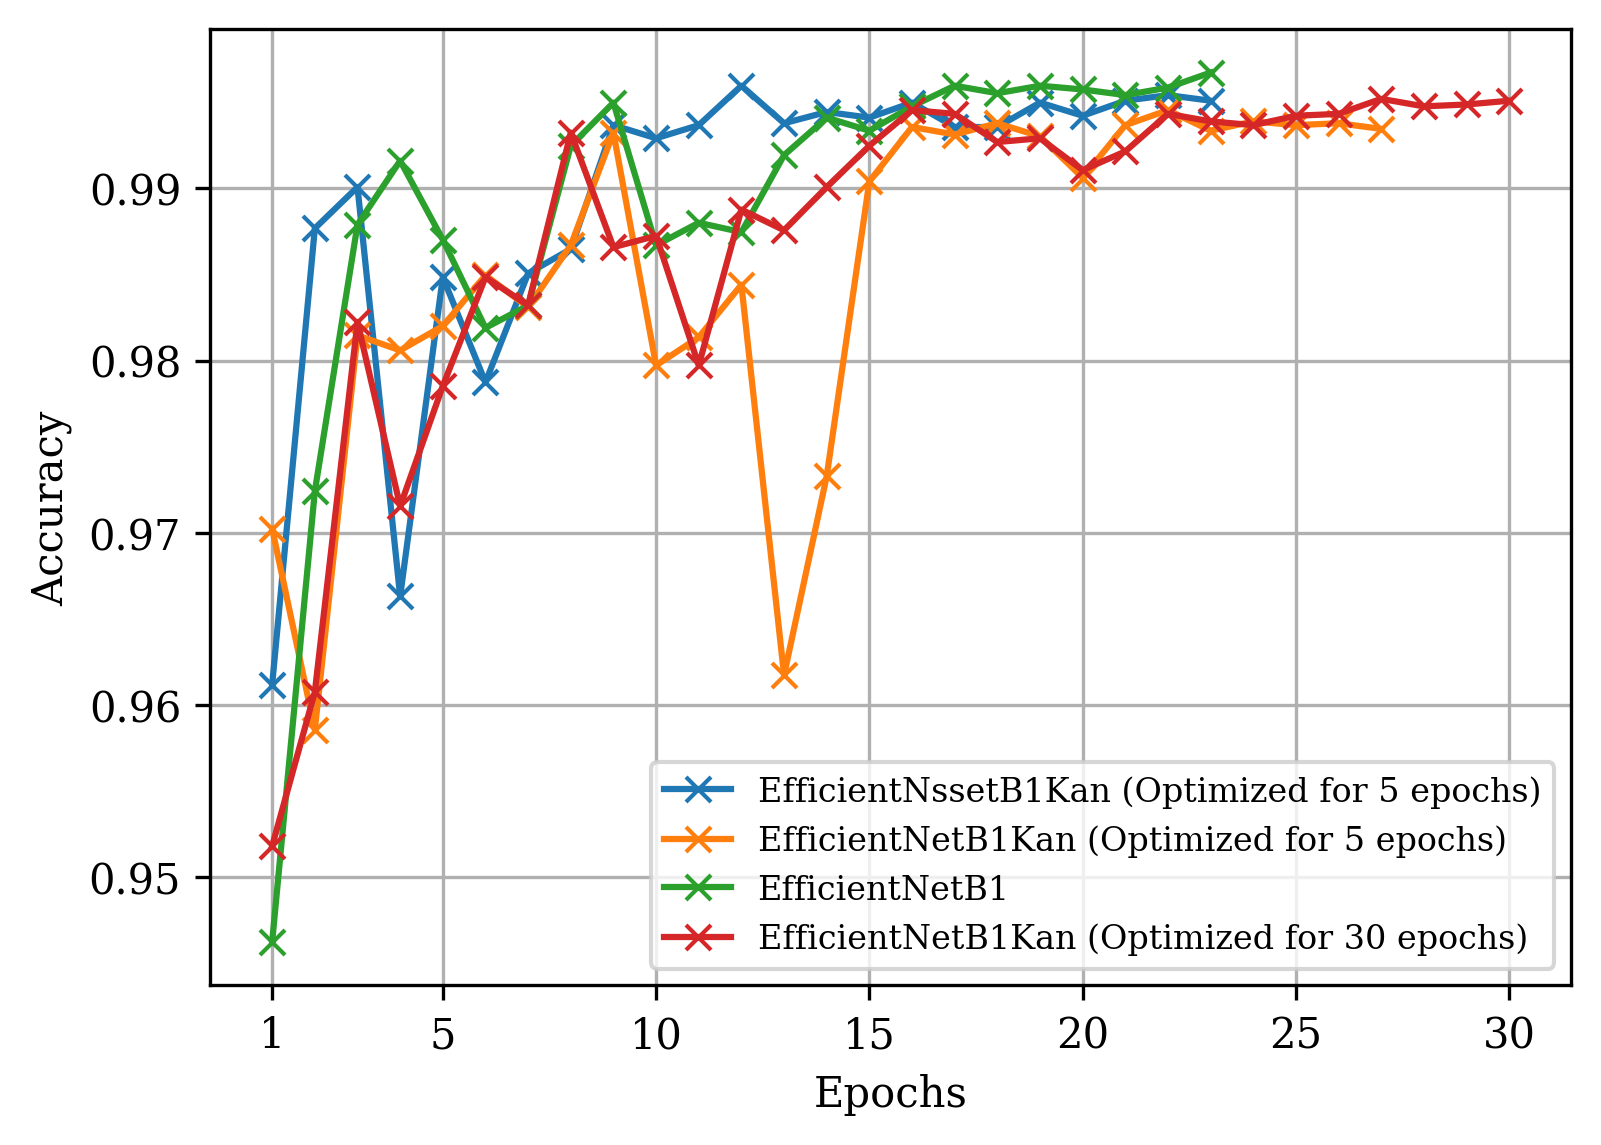

In [30]:

# Settings
A = 6  # Want figures to be A6
plt.rc('figure', figsize=[46.82 * .5 ** (.5 * A), 33.11 * .5 ** (.5 * A)])
# plt.rc('text', usetex=True)

# Increasing the resolution of the plot
plt.figure(dpi=300)

# Activating text rendering by LaTex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.monospace": 'Computer Modern Typewriter'
})

# Create some data
for i in data_array_pretrained:
    y = i["accuracy_testing"]
    x = np.arange(1, len(y) + 1, 1)

    # Plot
    plt.plot(x, y, "-x", label=hash_map[i["model_name"]])
plt.legend(fontsize=8)

plt.xticks([1, 5, 10, 15, 20, 25, 30])
plt.ylabel(r'Accuracy')
plt.xlabel(r'Epochs')

plt.grid()

plt.savefig("accuracy.pdf"), "Accuracy for epochs in testing dataset"phophophot

(None, 'Accuracy for epochs in validation dataset')

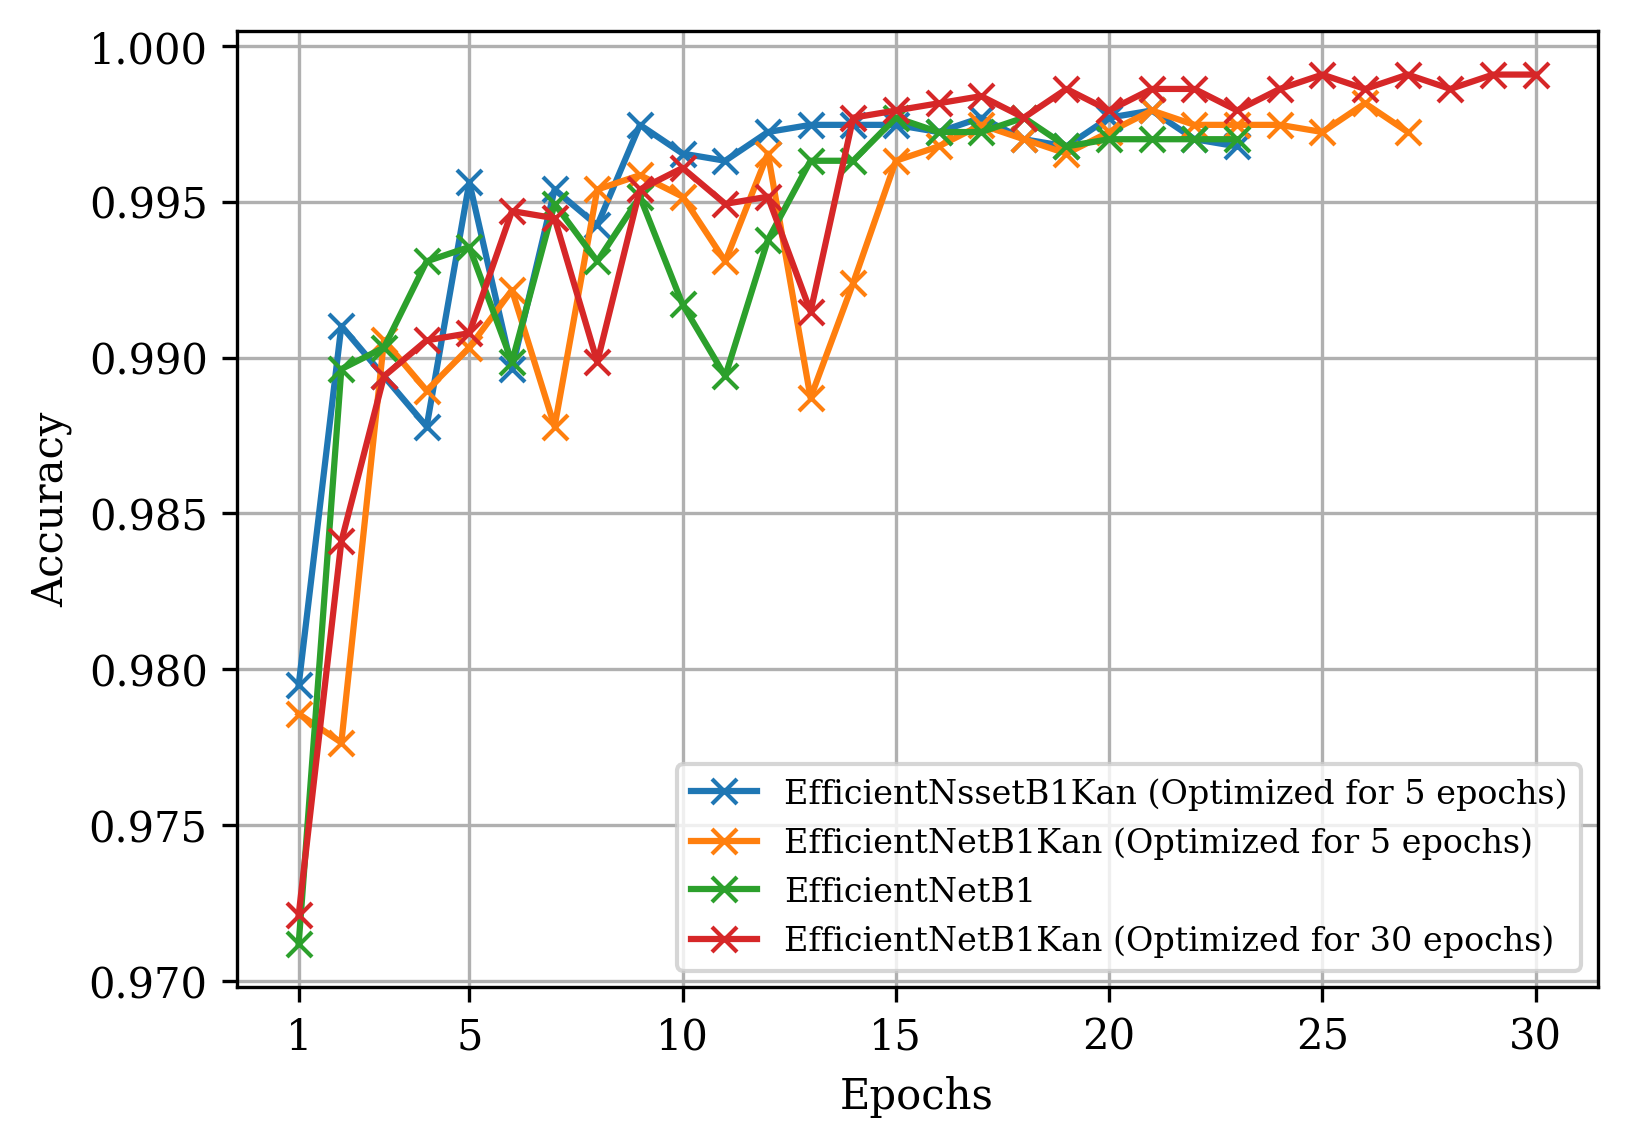

In [31]:

# Settings
A = 6  # Want figures to be A6
plt.rc('figure', figsize=[46.82 * .5 ** (.5 * A), 33.11 * .5 ** (.5 * A)])
# plt.rc('text', usetex=True)

# Increasing the resolution of the plot
plt.figure(dpi=300)

# Activating text rendering by LaTex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.monospace": 'Computer Modern Typewriter'
})

# Create some data
for i in data_array_pretrained:
    y = i["accuracy_validation"]
    x = np.arange(1, len(y) + 1, 1)

    # Plot
    plt.plot(x, y, "-x", label=hash_map[i["model_name"]])
plt.legend(fontsize=8)

plt.xticks([1, 5, 10, 15, 20, 25, 30])
plt.ylabel(r'Accuracy')
plt.xlabel(r'Epochs')

plt.grid()

plt.savefig("accuracy_validation.pdf"), "Accuracy for epochs in validation dataset"

(None, 'Accuracy for epochs in testing dataset')

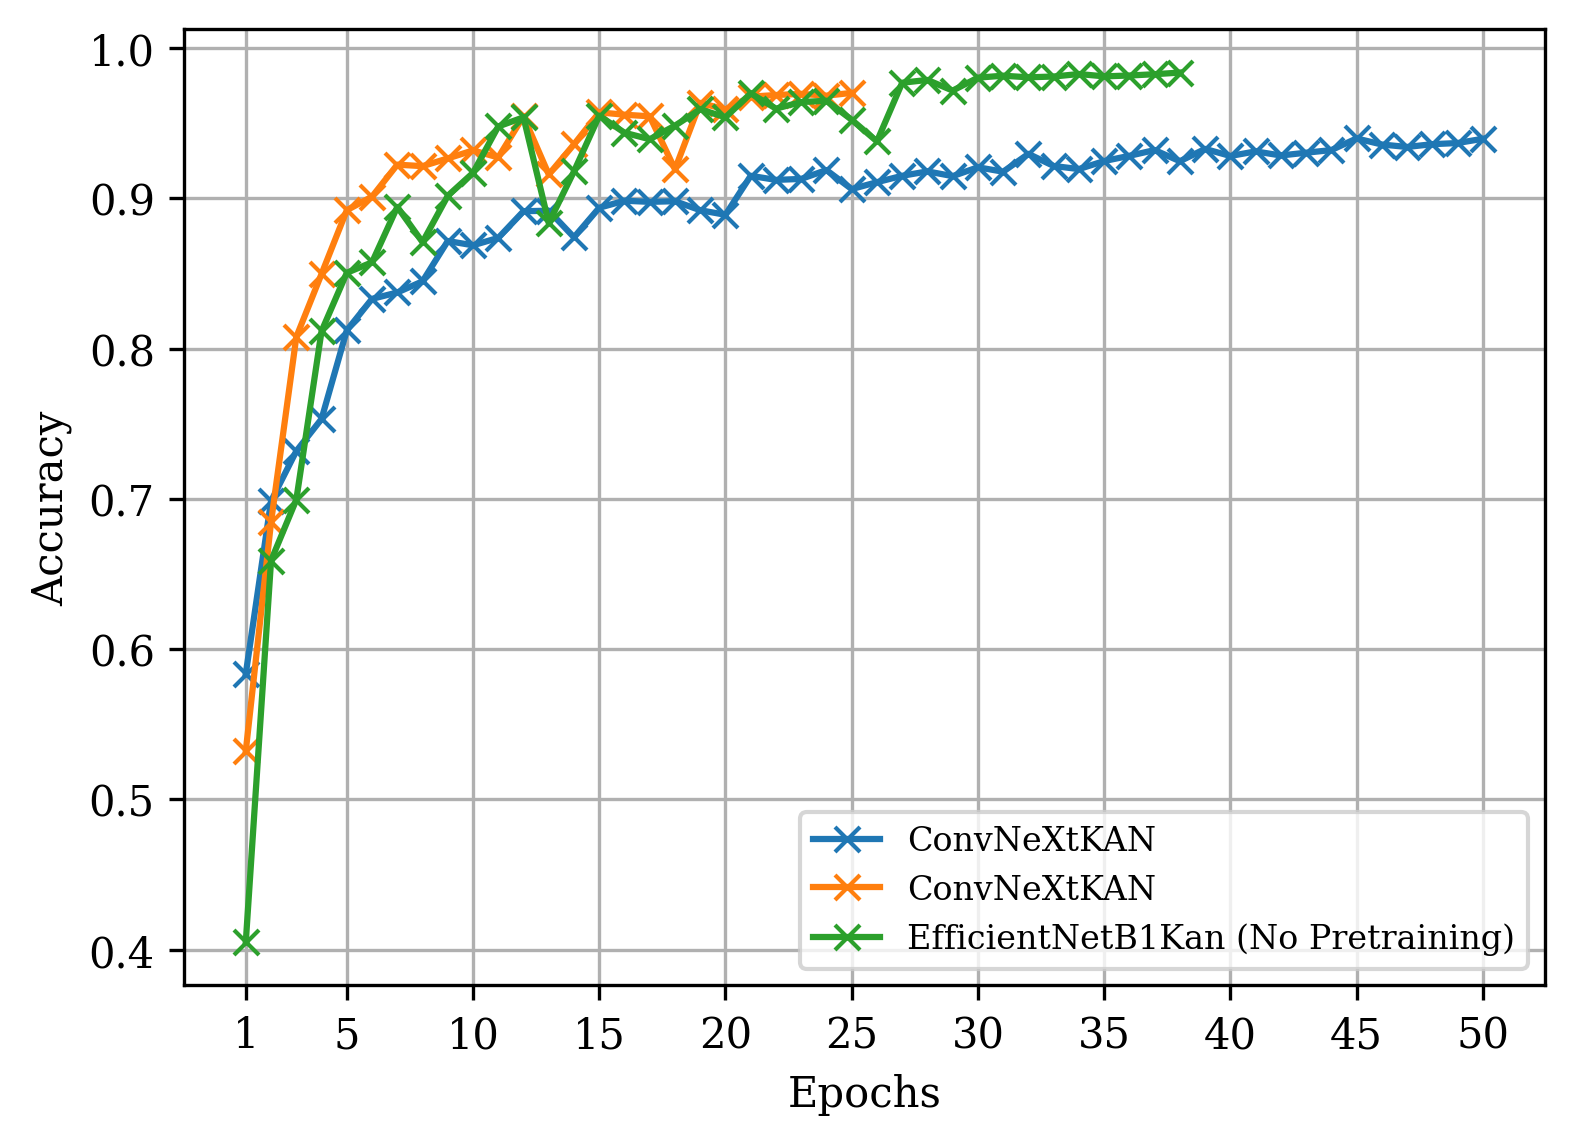

In [35]:

# Settings
A = 6  # Want figures to be A6
plt.rc('figure', figsize=[46.82 * .5 ** (.5 * A), 33.11 * .5 ** (.5 * A)])
# plt.rc('text', usetex=True)

# Increasing the resolution of the plot
plt.figure(dpi=300)

# Activating text rendering by LaTex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.monospace": 'Computer Modern Typewriter'
})

# Create some data
for i in data_array_not_pretrained:
    y = i["accuracy_testing"]
    x = np.arange(1, len(y) + 1, 1)

    # Plot
    plt.plot(x, y, "-x", label=hash_map[i["model_name"]])
plt.legend(fontsize=8)

plt.xticks([1, 5, 10, 15, 20, 25, 30,35,40, 45,50])
plt.ylabel(r'Accuracy')
plt.xlabel(r'Epochs')

plt.grid()

plt.savefig("accuracy_not_pretrained.pdf"), "Accuracy for epochs in testing dataset"

In [33]:
import pandas as pd


def generate_latex_table(data, caption, label):
    # Create a DataFrame
    df = pd.DataFrame(data)

    # Generate LaTeX table
    latex_table = df.to_latex(index=False, caption=caption, label=label, escape=False, float_format="%.4f", position="center", column_format="@{}|l|rrr|@{}")

    # Add some LaTeX formatting
    latex_table = latex_table.replace('table', 'table*')  # Make table span both columns
    latex_table = latex_table.replace('toprule', 'hline')
    latex_table = latex_table.replace('midrule', 'hline')
    latex_table = latex_table.replace('bottomrule', 'hline')

    return latex_table


# Example data
data_for_table = {
    'Model': [],
    'Time (s) per epocha': [],
    'Accuracy (\\%)': [],
    "Accuracy-max (\\%)": []
}

for i in data_array:
    data_for_table["Model"].append(hash_map[i["model_name"]])
    data_for_table['Time (s) per epocha'].append(np.average(np.array(i["time_trainings"])) / 1000)
    data_for_table["Accuracy (\\%)"].append(i["accuracy_testing"][-1] * 100)
    data_for_table["Accuracy-max (\\%)"].append(max(i["accuracy_testing"]) * 100)

caption = "Comparison of Model Performance by time for traing and accuracy of testing dataset"
label = "tab:model_comparison"

# Generate the LaTeX table
latex_output = generate_latex_table(data_for_table, caption, label)

# Print the LaTeX code
print(latex_output)


\begin{table*}[center]
\caption{Comparison of Model Performance by time for traing and accuracy of testing dataset}
\label{tab:model_comparison}
\begin{tabular}{@{}|l|rrr|@{}}
\hline
Model & Time (s) per epocha & Accuracy (\%) & Accuracy-max (\%) \\
\hline
ConvNeXtKAN & 39.7113 & 93.9695 & 93.9913 \\
ConvNeXtKAN & 62.8064 & 97.0229 & 97.0229 \\
EfficientNssetB1Kan (Optimized for 5 epochs) & 65.4684 & 99.5093 & 99.5965 \\
EfficientNetB1Kan (Optimized for 5 epochs) & 64.4453 & 99.3457 & 99.4547 \\
EfficientNetB1 & 63.7488 & 99.6728 & 99.6728 \\
EfficientNetB1Kan (No Pretraining) & 65.9382 & 98.3751 & 98.3751 \\
EfficientNetB1Kan (Optimized for 30 epochs) & 65.4711 & 99.5093 & 99.5202 \\
\hline
\end{tabular}
\end{table*}

